in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "2jsm"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [ ]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(0.720, 0.740, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

In [ ]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3854**

In [46]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(1.1986, 1.1987, 81)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

rm: cannot remove '#topol.top*': No such file or directory
rm: cannot remove '#2jsm*': No such file or directory


100%|██████████| 81/81 [01:08<00:00,  1.17it/s]


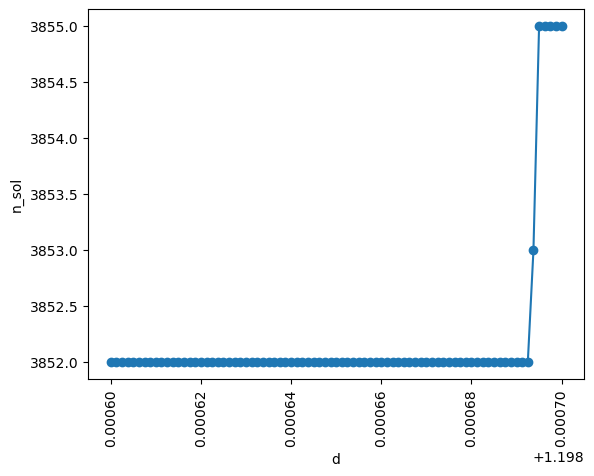

In [47]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

Since there is no way fix n_sol to 3854 <br>
use `-maxsol 3854` arg in `gmx solvent` command to fix the atom number

In [48]:
d2n_sol

{1.1986: 3852,
 1.19860125: 3852,
 1.1986025: 3852,
 1.19860375: 3852,
 1.198605: 3852,
 1.19860625: 3852,
 1.1986075: 3852,
 1.19860875: 3852,
 1.19861: 3852,
 1.19861125: 3852,
 1.1986125: 3852,
 1.19861375: 3852,
 1.198615: 3852,
 1.19861625: 3852,
 1.1986175: 3852,
 1.19861875: 3852,
 1.19862: 3852,
 1.19862125: 3852,
 1.1986225: 3852,
 1.19862375: 3852,
 1.198625: 3852,
 1.19862625: 3852,
 1.1986275: 3852,
 1.19862875: 3852,
 1.19863: 3852,
 1.19863125: 3852,
 1.1986325: 3852,
 1.19863375: 3852,
 1.198635: 3852,
 1.19863625: 3852,
 1.1986375: 3852,
 1.19863875: 3852,
 1.19864: 3852,
 1.19864125: 3852,
 1.1986425: 3852,
 1.19864375: 3852,
 1.198645: 3852,
 1.19864625: 3852,
 1.1986475: 3852,
 1.19864875: 3852,
 1.19865: 3852,
 1.19865125: 3852,
 1.1986525: 3852,
 1.19865375: 3852,
 1.198655: 3852,
 1.19865625: 3852,
 1.1986575: 3852,
 1.19865875: 3852,
 1.19866: 3852,
 1.19866125: 3852,
 1.1986625: 3852,
 1.19866375: 3852,
 1.198665: 3852,
 1.19866625: 3852,
 1.1986675: 3852,
 1.19